# CVRP Notebook
This notebook is intended to run the top level code for the CVRP

In [1]:
import networkx as nx

from model import VRP, create_constraints, output_variables
from pricer import VRPPricer
from parse import parse

from matplotlib import pyplot as plt

In [2]:
# Test instance E-n22-k4 provided by parser
G = parse("Instances/E/E-n22-k4.vrp")
# G = parse("Instances/E/E-n23-k3.vrp")
# G = parse("Instances/E/E-n30-k3.vrp")
# G = parse("Instances/E/E-n33-k4.vrp")
# G = parse("Instances/E/E-n51-k5.vrp")
# G = parse("Instances/E/E-n76-k14.vrp")

PARSE: Minimum number of trucks is 4


In [3]:
model = VRP(G)


# Create pricer
pricer = VRPPricer()
pricer.init_data(G)
pricer.data['elementary'] = False
pricer.data['max_vars']= 10000
pricer.data['abort_early'] = False
pricer.data['cyc2'] = True
pricer.data['ngParam'] = 5
print(f"set teh parameter")

model.includePricer(pricer, "pricer","does pricing")

create_constraints(model,G)

# model.hideOutput()
model.optimize()
model.hideOutput(quiet=False)
# model.printBestSol()

set teh parameter
PRICER_PY: The maximal path length is 32
ngParam is 5
1 is in the neighborhood of 5
2 is in the neighborhood of 5
3 is in the neighborhood of 5
4 is in the neighborhood of 5
6 is in the neighborhood of 5
PRICER_C: Graph data successfully copied to C.
presolving:
presolving (1 rounds: 1 fast, 1 medium, 1 exhaustive):
 0 deleted vars, 0 deleted constraints, 0 added constraints, 0 tightened bounds, 0 added holes, 0 changed sides, 0 changed coefficients
 0 implications, 0 cliques
presolved problem has 21 variables (0 bin, 0 int, 0 impl, 21 cont) and 22 constraints
     22 constraints of type <linear>
Presolving Time: 0.00

PY PRICING: Found 305 paths with reduced cost
 time | node  | left  |LP iter|LP it/n|mem/heur|mdpt |vars |cons |rows |cuts |sepa|confs|strbr|  dualbound   | primalbound  |  gap   | compl. 
  0.2s|     1 |     0 |    62 |     - |  1887k |   0 | 326 |  22 |  22 |   0 |  0 |   0 |   0 |      --      |      --      |    Inf | unknown
PY PRICING: Found 699 p

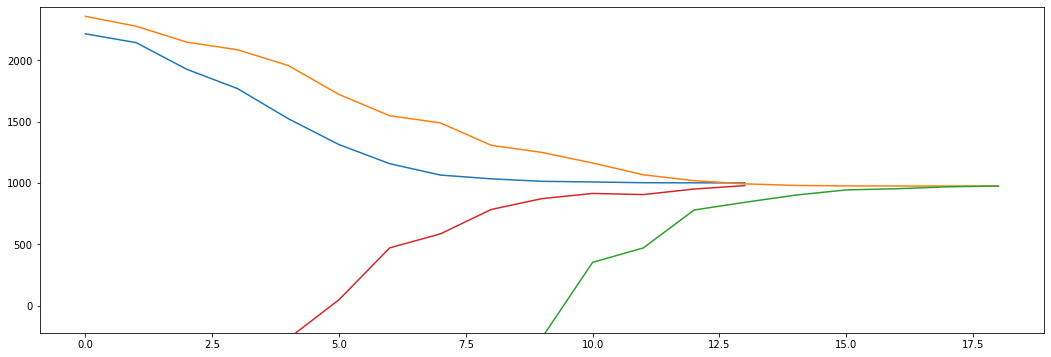

In [24]:
plt.figure(figsize=(18,6))
x1 = [x for x,y in pricer.data['bounds']]
y1 = [y for x,y in pricer.data['bounds']]
plt.plot(x)
plt.plot(x1)
plt.plot(y1)
plt.plot(y)
plt.ylim((-x[0]/10,x[0]*1.1))
# print(x)
# print(y)
plt.show()

In [12]:
output_variables(model, pricer)

The solution contains the following paths: 
0.15904662822587945 * x89837: (0, 6, 33, 1, 73, 33, 0)
0.10020923368453172 * x95739: (0, 53, 14, 59, 53, 0)
0.35694546687443107 * x95763: (0, 7, 11, 66, 65, 0)
0.15904662822587945 * x95771: (0, 62, 22, 64, 42, 43, 63, 0)
0.26012554021071904 * x95830: (0, 38, 66, 11, 0)
0.46550605059228495 * x95961: (0, 75, 4, 34, 46, 0)
0.36993722989464045 * x96108: (0, 38, 65, 66, 59, 0)
0.22973905006513867 * x96178: (0, 58, 10, 31, 58, 0)
0.17386715402711167 * x96736: (0, 12, 39, 31, 10, 72, 12, 0)
0.22669807881212659 * x96863: (0, 51, 16, 49, 24, 18, 50, 0)
0.26669050831477803 * x96935: (0, 51, 3, 44, 32, 9, 0)
0.45947810013027734 * x97358: (0, 26, 12, 40, 17, 0)
0.1970291603482437 * x97530: (0, 52, 54, 59, 14, 35, 0)
0.3232764926768212 * x97560: (0, 32, 25, 55, 31, 10, 0)
0.5405218998697227 * x97569: (0, 58, 72, 39, 9, 40, 0)
0.38292899291484994 * x97588: (0, 8, 19, 14, 53, 7, 0)
0.5000000000000003 * x97619: (0, 22, 64, 42, 41, 56, 23, 0)
0.26062366035869